In [3]:
pip install tensorflow

  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached grpcio-1.59.2-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached google_auth_oauthlib-1.1.0-py2.py3-none-any.whl (19 kB)
  Using cached google_auth-2.23.4-py2.py3-none-any.whl (183 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf    

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data=tf.keras.datasets.mnist
from tensorflow.keras.optimizers import SGD


In [6]:
(x_train,y_train),(x_test,y_test)=data.load_data()   

In [7]:
x_test.shape         

(10000, 28, 28)

In [8]:
x_train.shape    

(60000, 28, 28)

In [9]:
x_train,x_test =x_train/255,x_test/255      

In [10]:
model=tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28,28)),      
tf.keras.layers.Dense(150,activation='relu'),      
tf.keras.layers.Dense(10,activation='softmax')])   
    


In [11]:

sgd=SGD(0.02)    

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [12]:
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=5) 

Epoch 1/5


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6357 - accuracy: 0.8415 - val_loss: 0.3526 - val_accuracy: 0.9036
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3355 - accuracy: 0.9067 - val_loss: 0.2930 - val_accuracy: 0.9189
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2878 - accuracy: 0.9194 - val_loss: 0.2624 - val_accuracy: 0.9275
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2579 - accuracy: 0.9279 - val_loss: 0.2375 - val_accuracy: 0.9336
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2349 - accuracy: 0.9344 - val_loss: 0.2202 - val_accuracy: 0.9371


In [13]:

test_loss,test_acc=model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2202 - accuracy: 0.9371


313/313 [==============================] - 1s 2ms/step
4


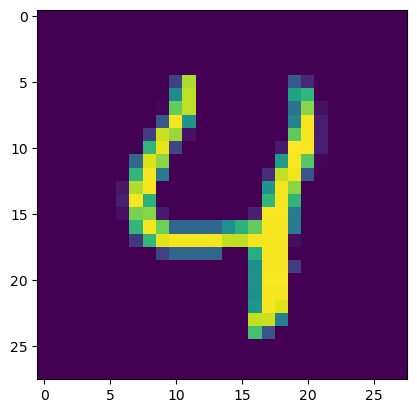

In [14]:
plt.imshow(x_test[4])
prediction=model.predict(x_test)   
print(np.argmax(prediction[4]))  


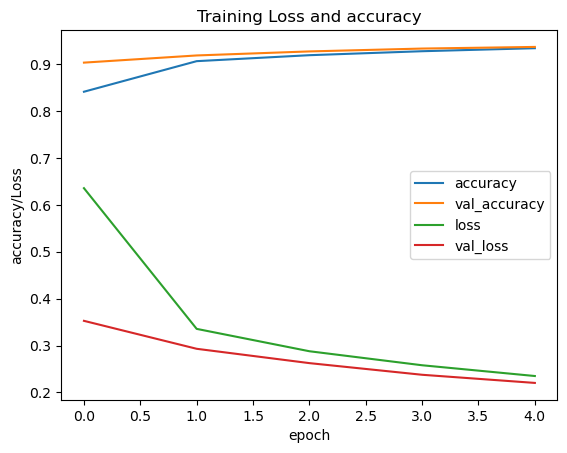

In [15]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()